In [171]:
import pandas as pd

df = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/abalone.csv").drop("id", axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [172]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [173]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [174]:
# Label을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [175]:
X = df.drop('Rings',axis=1).values
Y = df['Rings'].values

X, Y

(array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
        [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
        [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
        ...,
        [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
        [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
        [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]]),
 array([15,  7,  9, ...,  9, 10, 12], dtype=int64))

In [176]:
y = pd.get_dummies(Y).values
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 
X_train.shape, X_test.shape,  y_train.shape, y_test.shape,

((3341, 8), (836, 8), (3341, 28), (836, 28))

In [325]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 25)                  │             225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,623 (6.34 KB)

 Trainable params: 1,623 (6.34 KB)

 Non-trainable params: 0 (0.00 B)

In [327]:
N_EPOCHS = 15

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 9/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 

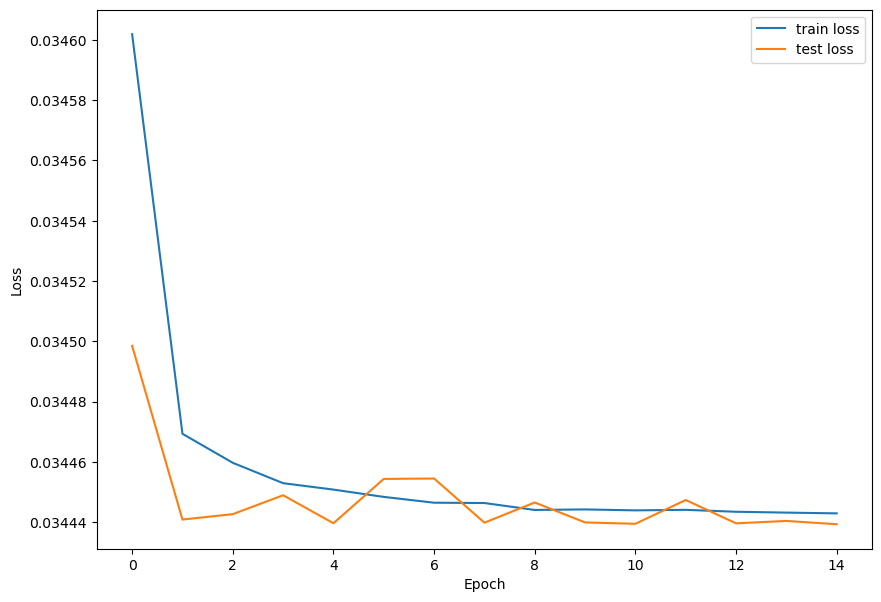

In [329]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [330]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mse: 0.0344 


[0.03443930298089981, 0.03443930298089981]